In [80]:
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

In [2]:
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data',
                 header=None,
                )
df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']

根据[官方描述](http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/heart-disease.names)，我只区分presence(values 1,2,3,4) 和 absence(value 0)。

In [3]:
df['target'] = df.num
df.loc[df.target != 0, 'target'] = 1
df.target.value_counts()

0    164
1    139
Name: target, dtype: int64

从上面的统计结果可以看出，这个数据集的类别是平衡的。

In [54]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,num,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.937294,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,1.228536,0.499120
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000,1.000000


# EDA

接下来我要对这个数据集的每**单个变量**分别进行EDA.

## age

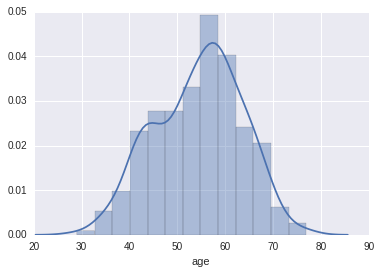

In [4]:
sns.distplot(df.age);

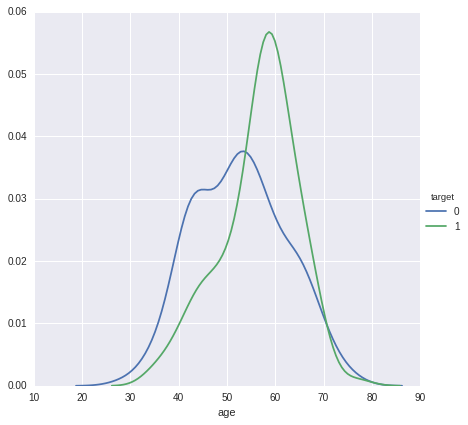

In [5]:
sns.FacetGrid(df, hue='target', size=6).map(sns.kdeplot, 'age').add_legend();

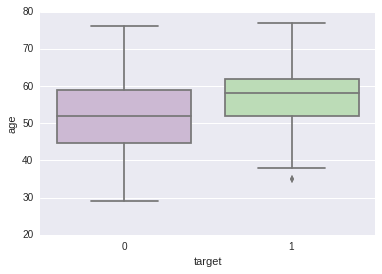

In [6]:
sns.boxplot(x="target", y="age", data=df, palette="PRGn");

从上面的分析中可以看出，年龄大的更容易心脏病。

## sex

In [7]:
# 1 = male; 0 = female
df.sex.value_counts()

1.0    206
0.0     97
Name: sex, dtype: int64

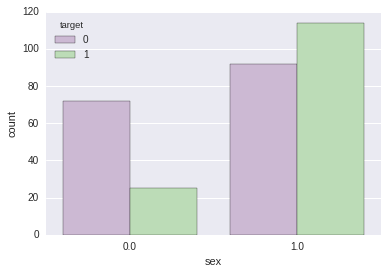

In [8]:
# 1 = male; 0 = female
sns.countplot(x="sex", hue="target", data=df, palette="PRGn");

从上图我们看出，女性中患有心脏病的概率大约为1/4，而男性中患有心脏病的概率大约为1/2，因此男性比女性更容易患有心脏病。

## cp

In [9]:
# chest pain type
# 1: typical angina
# 2: atypical angina
# 3: non-anginal pain
# 4: asymptomatic 

df.cp.value_counts()

4.0    144
3.0     86
2.0     50
1.0     23
Name: cp, dtype: int64

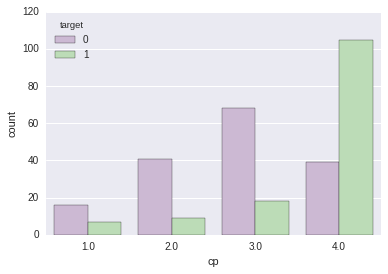

In [10]:
sns.countplot(x="cp", hue="target", data=df, palette="PRGn");

从上图我们看出，cp = 4更容易患有心脏病。

# trestbps

In [11]:
# trestbps: resting blood pressure (in mm Hg on admission to the hospital) 
df.trestbps.describe()

count    303.000000
mean     131.689769
std       17.599748
min       94.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: trestbps, dtype: float64

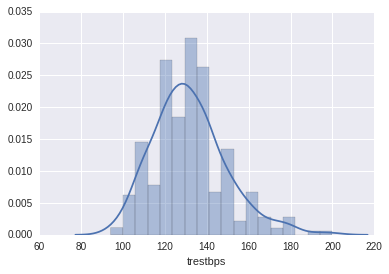

In [12]:
sns.distplot(df.trestbps);

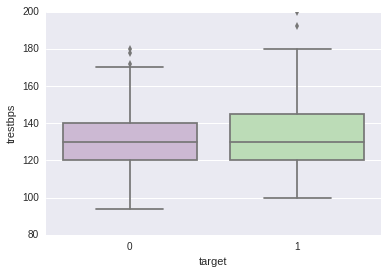

In [13]:
sns.boxplot(x="target", y="trestbps", data=df, palette="PRGn");

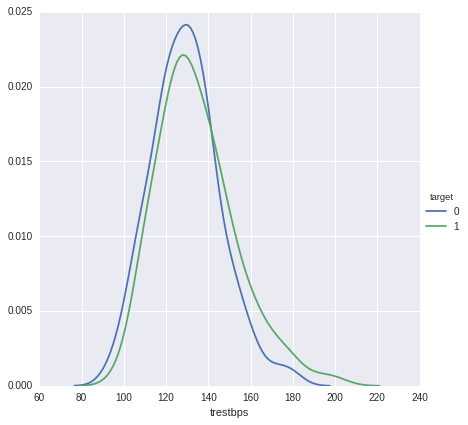

In [14]:
sns.FacetGrid(df, hue='target', size=6).map(sns.kdeplot, 'trestbps').add_legend();

从上面的分析来看，这个变量并没有很强的预测能力，在构建机器学习模型的时候，我可以不用这个变量。

# chol

In [15]:
# chol: serum cholestoral in mg/dl 
df.chol.describe()

count    303.000000
mean     246.693069
std       51.776918
min      126.000000
25%      211.000000
50%      241.000000
75%      275.000000
max      564.000000
Name: chol, dtype: float64

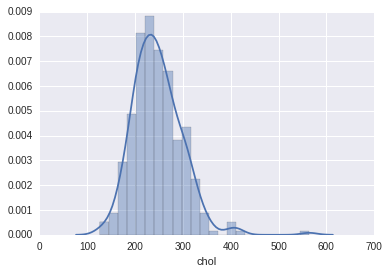

In [16]:
sns.distplot(df.chol);

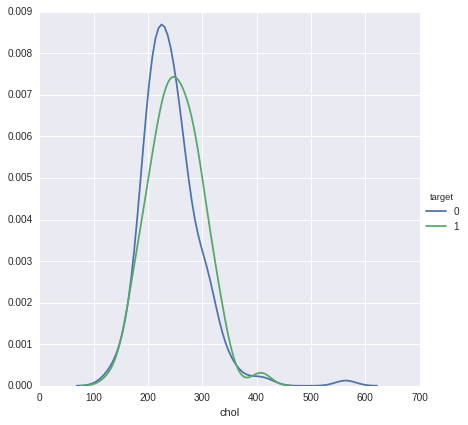

In [17]:
sns.FacetGrid(df, hue='target', size=6).map(sns.kdeplot, 'chol').add_legend();

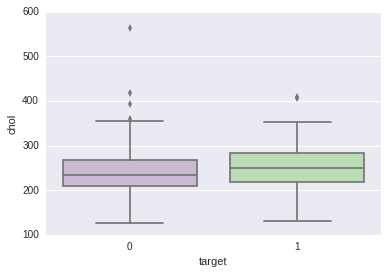

In [18]:
sns.boxplot(x="target", y="chol", data=df, palette="PRGn");

从上面的分析来看，这个变量并没有很强的预测能力，在构建机器学习模型的时候，我可以不用这个变量。

# fbs

In [19]:
# fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 
df.fbs.value_counts()

0.0    258
1.0     45
Name: fbs, dtype: int64

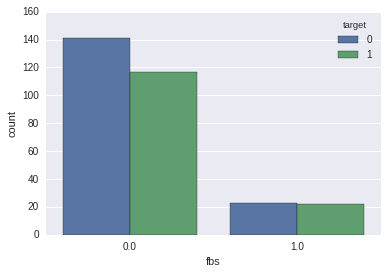

In [20]:
sns.countplot(x="fbs", hue="target", data=df);

从上图我们看出，fbs变量并没有什么预测能力, 因为在fbs = 0时，患有心脏病和没患心脏病的人数差不多，fbs = 1也是同样的道理。

# restecg

In [21]:
# restecg: resting electrocardiographic results
# -- Value 0: normal
# -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
# -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria 

df.restecg.value_counts()

0.0    151
2.0    148
1.0      4
Name: restecg, dtype: int64

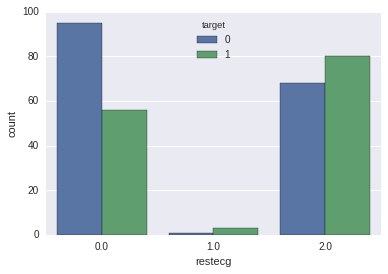

In [22]:
sns.countplot(x="restecg", hue="target", data=df);

当restecg = 0时，患有心脏病的人要比没患的人少，但是，当restecg = 1 or 2时，患有心脏病的人要比没患的人少多，证明restecg变量是有一定预测能力的。

# thalach

In [23]:
# thalach: maximum heart rate achieved 
df.thalach.describe()

count    303.000000
mean     149.607261
std       22.875003
min       71.000000
25%      133.500000
50%      153.000000
75%      166.000000
max      202.000000
Name: thalach, dtype: float64

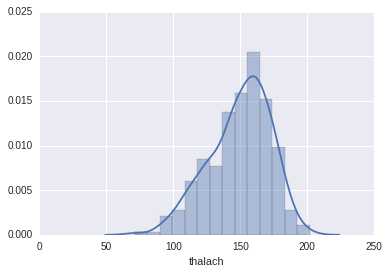

In [24]:
sns.distplot(df.thalach);

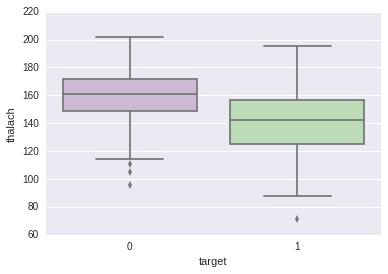

In [25]:
sns.boxplot(x="target", y="thalach", data=df, palette="PRGn");

这是一个具有很强预测能力的变量，患有心脏病人的thalach要比没患的人低。

# exang

In [26]:
# exang: exercise induced angina (1 = yes; 0 = no) 
df.exang.value_counts()

0.0    204
1.0     99
Name: exang, dtype: int64

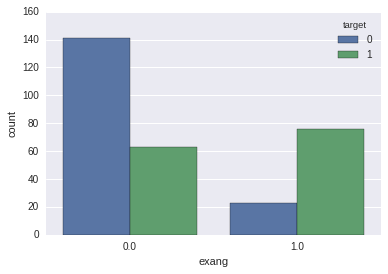

In [27]:
sns.countplot(x='exang', hue='target', data=df);

这也是一个很重要的变量。

# oldpeak

In [28]:
# oldpeak = ST depression induced by exercise relative to rest 
df.oldpeak.value_counts().head(15)

0.0    99
1.2    17
0.6    14
1.0    14
0.8    13
1.4    13
0.2    12
1.6    11
1.8    10
2.0     9
0.4     9
0.1     7
2.8     6
2.6     6
3.0     5
Name: oldpeak, dtype: int64

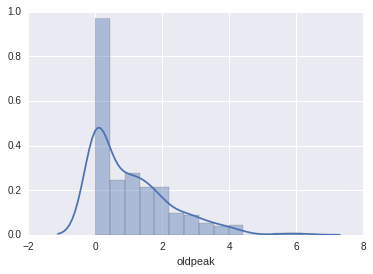

In [29]:
sns.distplot(df.oldpeak);

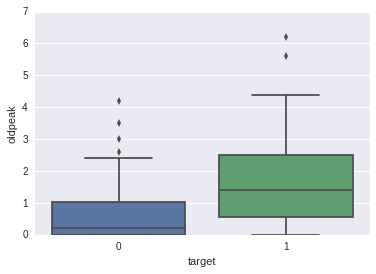

In [30]:
sns.boxplot(x='target', y='oldpeak', data=df);

这同样也是一个很重要的变量。

# slope

In [31]:
# slope: the slope of the peak exercise ST segment
# -- Value 1: upsloping
# -- Value 2: flat
# -- Value 3: downsloping 

df.slope.value_counts()

1.0    142
2.0    140
3.0     21
Name: slope, dtype: int64

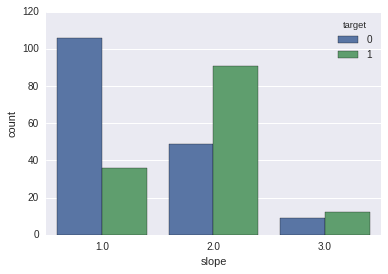

In [32]:
sns.countplot(x='slope', hue='target', data=df);

# ca

In [33]:
# ca: number of major vessels (0-3) colored by flourosopy
df.ca.value_counts()

0.0    176
1.0     65
2.0     38
3.0     20
?        4
Name: ca, dtype: int64

从上面的统计数据可以看出，变量ca存在4个缺失值，这里我们用**众数**来补充上。

In [35]:
df.loc[df.ca == '?', 'ca'] = '0.0'

In [36]:
df.ca.value_counts()

0.0    180
1.0     65
2.0     38
3.0     20
Name: ca, dtype: int64

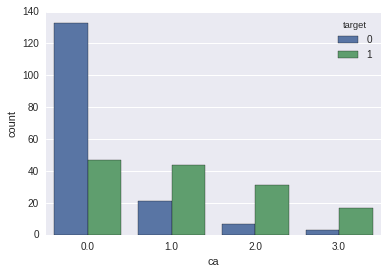

In [37]:
sns.countplot(x='ca', hue='target', data=df);

# thal

In [40]:
# thal: 3 = normal; 6 = fixed defect; 7 = reversable defect 
df.thal.value_counts()

3.0    166
7.0    117
6.0     18
?        2
Name: thal, dtype: int64

从上面的统计数据可以看出，变量thal存在2个缺失值，这里我们用众数来补充上。

In [41]:
df.loc[df.thal == '?', 'thal'] = '3.0'

In [42]:
df.thal.value_counts()

3.0    168
7.0    117
6.0     18
Name: thal, dtype: int64

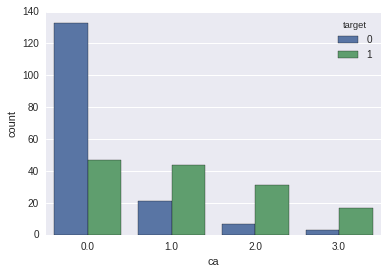

In [43]:
sns.countplot(x='ca', hue='target', data=df);

现在，我们已经把所有的单变量分析完了，在这个过程中，我发现几个预测能力不是很强的变量，为了简化问题，我把这几个变量去除掉，它们分别是：**fbs、chol、trestbps**

下面，我用逻辑回归做一下分类。

scikit-learn中的LogisticRegression分类器总共有4个solver，它们分别是**'newton-cg', 'lbfgs', 'liblinear', 'sag'**. 它们每一个都有各自适合的场景。下面，我分别说明一下这些场景。

1. *liblinear:* 它使用的coordinate descent算法，可以使用L1 penalization，也就是可以学习sparse model. 但是它不能学习真正的multinomial model，它用的是“one-vs-rest”方法。
2. *newton-cg和lbfgs:* 它们可以学习真正的 multinomial logistic regression model，这也就是说它们的probability estimates比“one-vs-rest”方法更加准确。但是，它们不能optimize L1-penalized模型，因此它们不能学习sparse model.
3. *sag:* 它即不能学习sparse model，也不能学习真正的 multinomial logistic regression model. 但是，它对于大数据集来说，比其它的splver收敛地更快。

总结来说：

| Case | Solver |
| :-------------: |:-------------:|
| Small dataset or L1 penalty | liblinear |
| Multinomial loss | lbfgs” or newton-cg |
| Large dataset | sag |

In [93]:
X = df_sub.iloc[:, :-1].values
y = df.target.values

In [97]:
lr = LogisticRegression(penalty='l1',
                        C=1, # Inverse of regularization strength
                        random_state=2016820, # The seed to use when shuffling the data
                        solver = 'liblinear', 
                        n_jobs=-1, # use all CPU cores 
                    )

# 由于分类器用到了shrinkage（即 l1-penalty）方法，因此我们应该把数据集standardization
std = preprocessing.StandardScaler().fit_transform(X)

lr.fit(X, y)

print('training set accuracy rate：', lr.score(X, y))

training set accuracy rate： 0.861386138614
